In [2]:
import pandas as pd 

In [3]:
rename_dict = {
    "일시": "날짜",
    "평균기온(°C)": "평균 기온",
    "최고기온(°C)": "최고 기온",
    "평균상대습도(%)": "습도"
}

In [4]:
df = pd.read_csv("./weather_csv/weather_data.csv", encoding="cp949").rename(columns=rename_dict)

In [5]:
df.columns

Index(['지점', '지점명', '날짜', '평균 기온', '최고 기온', '습도'], dtype='object')

In [6]:
for col in ["평균 기온", "최고 기온","습도"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [7]:
df.head()

,지점,지점명,날짜,평균 기온,최고 기온,습도
0,90,속초,2020-06,22.2,33.2,74.0
1,90,속초,2020-07,21.6,33.3,85.0
2,90,속초,2020-08,25.7,35.1,82.0
3,90,속초,2020-09,20.1,28.7,75.0
4,90,속초,2020-10,14.3,23.7,60.0


In [8]:
region_map = {
    # 강원도
    "강릉": "강원도", "대관령": "강원도", "동해": "강원도", "북강릉": "강원도",
    "북춘천": "강원도", "삼척": "강원도", "속초": "강원도", "영월": "강원도",
    "원주": "강원도", "인제": "강원도", "정선군": "강원도", "철원": "강원도",
    "춘천": "강원도", "태백": "강원도", "홍천": "강원도",

    # 경기
    "동두천": "경기", "수원": "경기", "양평": "경기", "이천": "경기", "파주": "경기",

    # 경남
    "거제": "경남", "거창": "경남", "김해시": "경남", "남해": "경남", "밀양": "경남",
    "북창원": "경남", "산청": "경남", "양산시": "경남", "의령군": "경남", "진주": "경남",
    "창원": "경남", "통영": "경남", "함양군": "경남", "합천": "경남",

    # 경북
    "경주시": "경북", "구미": "경북", "문경": "경북", "봉화": "경북", "상주": "경북",
    "안동": "경북", "영덕": "경북", "영주": "경북", "영천": "경북", "울릉도": "경북",
    "울진": "경북", "의성": "경북", "청송군": "경북", "포항": "경북",

    # 광역시 및 특별시
    "광주": "광주", "대구": "대구", "대전": "대전",
    "부산": "부산", "북부산": "부산", "서울": "서울",
    "세종": "세종", "울산": "울산", "강화": "인천", "백령도": "인천", "인천": "인천",

    # 전남
    "강진군": "전남", "고흥": "전남", "광양시": "전남", "목포": "전남", "무안": "전남",
    "보성군": "전남", "순천": "전남", "여수": "전남", "영광군": "전남", "완도": "전남",
    "장흥": "전남", "주암": "전남", "진도군": "전남", "해남": "전남", "흑산도": "전남",

    # 전북
    "고창": "전북", "고창군": "전북", "군산": "전북", "남원": "전북", "부안": "전북",
    "순창군": "전북", "임실": "전북", "장수": "전북", "전주": "전북", "정읍": "전북",

    # 제주
    "고산": "제주도", "서귀포": "제주도", "성산": "제주도", "제주": "제주도",

    # 충남
    "금산": "충남", "보령": "충남", "부여": "충남", "서산": "충남", "천안": "충남", "홍성": "충남",

    # 충북
    "보은": "충북", "서청주": "충북", "제천": "충북", "청주": "충북", "추풍령": "충북", "충주": "충북"
}


In [9]:
df["지역"] = df["지점명"].map(region_map)
# 지점, 지점명 제거 및 지역 맨앞으로
df = df.drop(columns=['지점', '지점명'])
cols = ['지역'] + [col for col in df.columns if col != '지역']
df = df[cols]

In [10]:
# 날짜에서 연도와 월 분리
df['연도'] = df['날짜'].str[:4].astype(int)
df['월'] = df['날짜'].str[5:7].astype(int)

df.drop(columns=['날짜'], inplace=True)

# 결과 확인
df.head()


,지역,평균 기온,최고 기온,습도,연도,월
0,강원도,22.2,33.2,74.0,2020,6
1,강원도,21.6,33.3,85.0,2020,7
2,강원도,25.7,35.1,82.0,2020,8
3,강원도,20.1,28.7,75.0,2020,9
4,강원도,14.3,23.7,60.0,2020,10


In [11]:
# 6, 7, 8월만 남기기
df = df[df['월'].isin([6, 7, 8])].reset_index(drop=True)

df.head()

,지역,평균 기온,최고 기온,습도,연도,월
0,강원도,22.2,33.2,74.0,2020,6
1,강원도,21.6,33.3,85.0,2020,7
2,강원도,25.7,35.1,82.0,2020,8
3,강원도,20.3,30.0,81.0,2021,6
4,강원도,25.5,33.2,85.0,2021,7


In [12]:
df.tail()

,지역,평균 기온,최고 기온,습도,연도,월
1432,부산,26.1,34.9,86.0,2023,7
1433,부산,27.9,35.7,77.0,2023,8
1434,부산,23.2,33.6,74.0,2024,6
1435,부산,27.1,37.0,87.0,2024,7
1436,부산,29.3,36.8,80.0,2024,8


In [13]:
df2 = pd.read_csv('./power/주택용_전력데이터.csv')

In [14]:
# 시도 코드와 시도명 매핑 딕셔너리
sido_mapping = {
    11: '서울',
    26: '부산',
    27: '대구',
    28: '인천',
    29: '광주',
    30: '대전',
    31: '울산',
    36: '세종',
    41: '경기',
    43: '충북',
    44: '충남',
    46: '전남',
    47: '경북',
    48: '경남',
    50: '제주',
    51: '강원도',
    52: '전북'
}

In [15]:
# 시도명을 새 컬럼으로 추가
df2['지역'] = df2['시도'].map(sido_mapping)

In [16]:
df2.drop(columns=['시도'], inplace=True)

In [17]:
df2.head()

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역
0,2020,6,1135016306,124221044153,109.4,서울
1,2020,7,1217456430,130444022697,107.1,서울
2,2020,8,1411611643,155152238181,109.9,서울
3,2021,6,1127819486,118440986106,105.0,서울
4,2021,7,1391209916,161420259249,116.0,서울


In [18]:
merged_df = pd.merge(df2, df, on=['연도', '월', '지역'], how='inner')

merged_df.head()

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역,평균 기온,최고 기온,습도
0,2020,6,1135016306,124221044153,109.4,서울,23.9,35.4,68.0
1,2020,7,1217456430,130444022697,107.1,서울,24.1,32.9,77.0
2,2020,8,1411611643,155152238181,109.9,서울,26.5,34.5,85.0
3,2021,6,1127819486,118440986106,105.0,서울,22.8,31.6,73.0
4,2021,7,1391209916,161420259249,116.0,서울,28.1,36.5,71.0


In [19]:
import matplotlib.pyplot as plt

In [20]:
df2['날짜'] = pd.to_datetime(df2['연도'].astype(str) + '-' + df2['월'].astype(str) + '-01')

df2 = df2.sort_values(['지역', '날짜'])

In [21]:
df2

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역,날짜
225,2020,6,176739469,18495377497,104.6,강원도,2020-06-01
226,2020,7,177874072,17241347868,96.9,강원도,2020-07-01
227,2020,8,204423371,19190822652,93.9,강원도,2020-08-01
228,2021,6,179556200,18124201742,100.9,강원도,2021-06-01
229,2021,7,191086604,18920818251,99.0,강원도,2021-07-01
...,...,...,...,...,...,...,...
145,2023,7,217655270,33105785916,152.1,충북,2023-07-01
146,2023,8,283069920,44635415831,157.7,충북,2023-08-01
147,2024,6,190021648,29918943941,157.5,충북,2024-06-01
148,2024,7,221643230,34036497285,153.6,충북,2024-07-01


In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

# 한글 폰트 설정 (Windows - 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

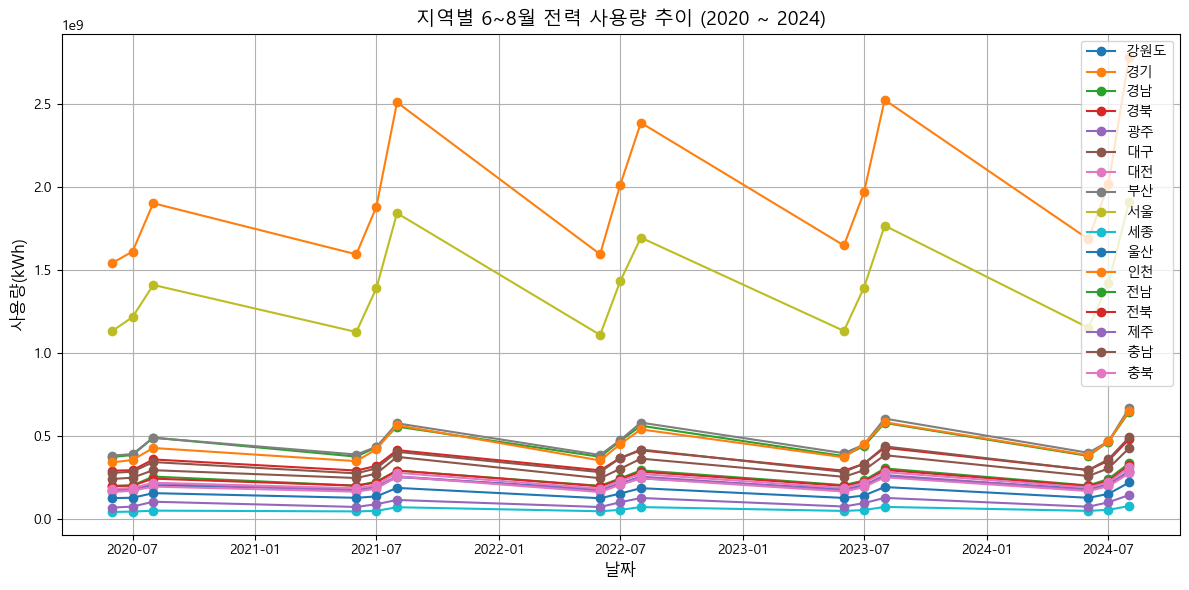

In [24]:
plt.figure(figsize=(12, 6))

for region in df2['지역'].unique():
    region_df = df2[df2['지역'] == region]
    plt.plot(region_df['날짜'], region_df['사용량(kWh)'], marker='o', label=region)

plt.title('지역별 6~8월 전력 사용량 추이 (2020 ~ 2024)', fontsize=14)
plt.xlabel('날짜', fontsize = 12)
plt.ylabel('사용량(kWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

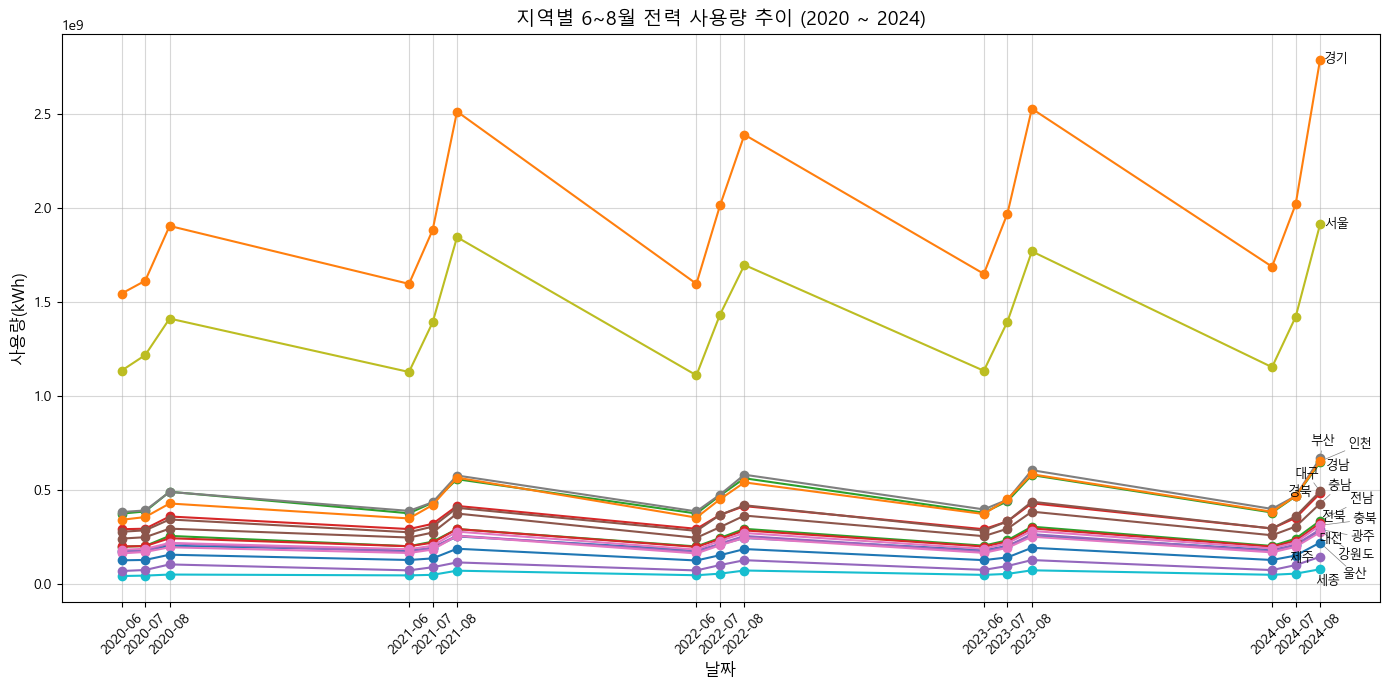

In [28]:
from adjustText import adjust_text

plt.figure(figsize=(14, 7))
texts=[]

# 지역별로 선 그래프
for region in df2['지역'].unique():
    region_df = df2[df2['지역'] == region]
    plt.plot(region_df['날짜'], region_df['사용량(kWh)'], marker='o')

    last_x = region_df['날짜'].iloc[-1]
    last_y = region_df['사용량(kWh)'].iloc[-1]
    texts.append(plt.text(last_x, last_y, region, fontsize=9, va='center', ha='left'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title('지역별 6~8월 전력 사용량 추이 (2020 ~ 2024)', fontsize=14)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('사용량(kWh)', fontsize=12)
plt.grid(True, alpha=0.5)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(sorted(df2['날짜'].unique()), rotation=45)

plt.tight_layout()
plt.show()
